####The lab was made by Andrusyshyn Orest.
####Lab Option: 3
####Random walks:
####1) Continuos length, discrete direction (parameters to investigate: step size, number of agents, distribution of step size).  
####2) "Levy" with heavy-tailed distributions (parameters to investigate: step size, number of agents, type of distribution of step size).  
####3) "Deterministic" (parameters to investigate: step size, number of agents, coefficient r of the equation "x_(n+1) = r * x_n(1-x_n)").
#### All experiments were run on 201 x 201 world.
#### For experiments with fixed num, num was equal 300.
#### For experiments with fixed step-size, step-size was equal 1.

In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
indexes_for_first = {"[run number]": 0,
                     "distribution": 1,
                     "step-size": 2,
                     "num": 3,
                     "rw-type": 4,
                     "[step]": 5,
                     "ticks-till-border": 6,
                     "max-diff-msd": 7,
                     "mean-displacement": 8 
                     }

colors_for_first = {"uniform": "green",
                    "poisson": "red",
                    "normal": "black",
                    "exponential": "blue",
                    "gamma": "yellow"}

colors_for_levy = {"pareto": "black",
                   "cauchy": "red",
                   "lognormal": "blue"}

colors_for_deterministic = {"0": "black",
                            "1": "red",
                            "4": "blue"}

In [14]:
def find_mean(lst: list):
    denominator = len(lst)
    for el in lst:
      if el == 0:
        denominator -= 1
    if denominator > 0:
      return sum(lst)/denominator
    return -10

In [15]:
def set_dict(type: int) -> dict:
    """
    type: 1 - discrete directions, continuous step;
          2 - levy
          3 - deterministic
    """

    if type == 1:
        ### {"uniform": {size-step or num: {"time_to_cover": [],
        ###                                 "time_to_border": [],
        ###                                 "max_diff_msd": [],
        ###                                 "mean_displacement": []}}}
        return {"uniform": dict(),
                "poisson": dict(),
                "normal": dict(),
                "exponential": dict(),
                "gamma": dict(),
                }
    elif type == 2:
        ### {"uniform": {size-step or num: {"time_to_cover": [],
        ###                                 "time_to_border": [],
        ###                                 "max_diff_msd": [],
        ###                                 "mean_displacement": []}}}
        return {"pareto": dict(),
                "cauchy": dict(),
                "lognormal": dict(),
                }
    elif type == 3:
        ### {"0": {size-step or num: {"time_to_cover": [],
        ###                           "time_to_border": [],
        ###                           "max_diff_msd": [],
        ###                           "mean_displacement": []}}}
        return {"0": dict(),
                "1": dict(),
                "4": dict()
                }
    else:
        print("""Error in set_dict:
                type should be:
                1 - discrete directions, continuous step;
                2 - levy
                3 - deterministic""")
        exit()

In [16]:
def read_csv(name: str, param: str, type: int) -> dict:
    """
    type: 1 - discrete directions, continuous step;
          2 - levy
          3 - deterministic
    """

    rw = set_dict(type)

    with open(file=name, mode="r") as file_time:
        file_time.readline()
        for line in file_time:
            line = line.strip()
            splitted_line = line.split(',"')
            length = len(splitted_line)
            for ind in range(length):
                splitted_line[ind] = splitted_line[ind].strip('"')

            dist = splitted_line[indexes_for_first["distribution"]]
            key = float(splitted_line[indexes_for_first[param]])
            time_to_cover = int(splitted_line[indexes_for_first["[step]"]])
            time_to_border = int(splitted_line[indexes_for_first["ticks-till-border"]])
            max_diff_msd = float(splitted_line[indexes_for_first["max-diff-msd"]])
            mean_displacement = float(splitted_line[indexes_for_first["mean-displacement"]])

            if key in rw[dist].keys():
                rw[dist][key]["time_to_cover"].append(time_to_cover)
                rw[dist][key]["time_to_border"].append(time_to_border)
                rw[dist][key]["max_diff_msd"].append(max_diff_msd)
                rw[dist][key]["mean_displacement"].append(mean_displacement)
            else:
                rw[dist][key] = {"time_to_cover": [time_to_cover],
                                 "time_to_border": [time_to_border],
                                 "max_diff_msd": [max_diff_msd],
                                 "mean_displacement": [mean_displacement]}


    for dist_key in rw.keys():
        for key in rw[dist_key].keys():
            mean_cover_time = find_mean(rw[dist_key][key]["time_to_cover"])
            mean_border_time = find_mean(rw[dist_key][key]["time_to_border"])
            mean_max_diff_msd = find_mean(rw[dist_key][key]["max_diff_msd"])
            mean_mean_displacement = find_mean(rw[dist_key][key]["mean_displacement"])
            rw[dist_key][key] = {"time_to_cover": mean_cover_time,
                                 "time_to_border": mean_border_time,
                                 "max_diff_msd": mean_max_diff_msd,
                                 "mean_displacement": mean_mean_displacement
                                 }
    return rw

In [17]:
def make_plot(dist: str, rw: dict, paramx: str, paramy: str, colors: dict, scatter=False):
    plt.xlabel(paramx)
    plt.ylabel(paramy)
    plt.title(f'{dist}: {paramy} depending on {paramx}')
    for dist_key in rw.keys():
        legend_dist = dist_key
        if dist == "Deterministic":
            legend_dist = "r=" + dist_key
        x_list = list(rw[dist_key].keys())
        x_list.sort()
        y_list = []
        for key in x_list:
            y_list.append(rw[dist_key][key][paramy])

        if scatter:
            plt.scatter(x_list, y_list, color=colors[dist_key], label=f"{legend_dist}_{paramy}")
        else:
            plt.plot(x_list, y_list, color=colors[dist_key], label=f"{legend_dist}_{paramy}")
    plt.legend()
    plt.show()

In [18]:
first_rw_step = read_csv(name="experiment_for_discrete_directions_continious_step_step-size-table.csv", param="step-size", type=1)
first_rw_num = read_csv(name="experiment_for_discrete_directions_continious_step_num-table.csv", param="num", type=1)
levy_rw_step = read_csv(name="experiment_for_levy_step-size-table.csv", param="step-size", type=2)
levy_rw_num = read_csv(name="experiment_for_levy_num-table.csv", param="num", type=2)
deterministic_rw_step = read_csv(name="experiment_for_deterministic_step-size-table.csv", param="step-size", type=3)
deterministic_rw_num = read_csv(name="experiment_for_deterministic_num-table.csv", param="num", type=3)

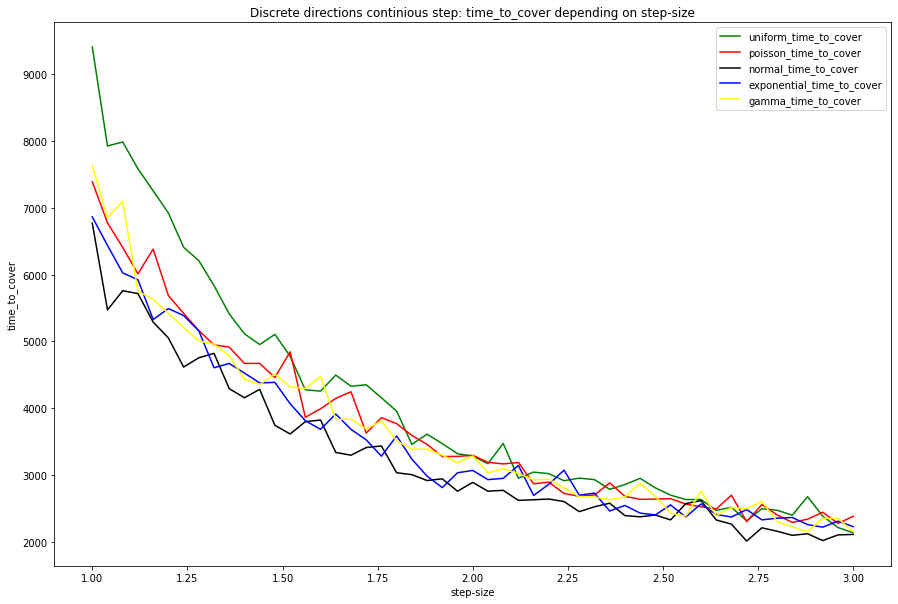

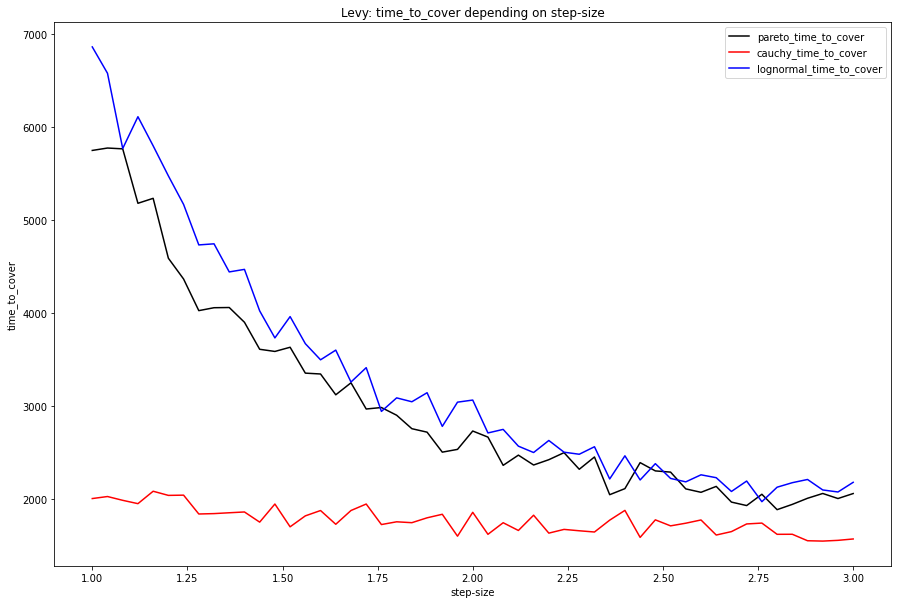

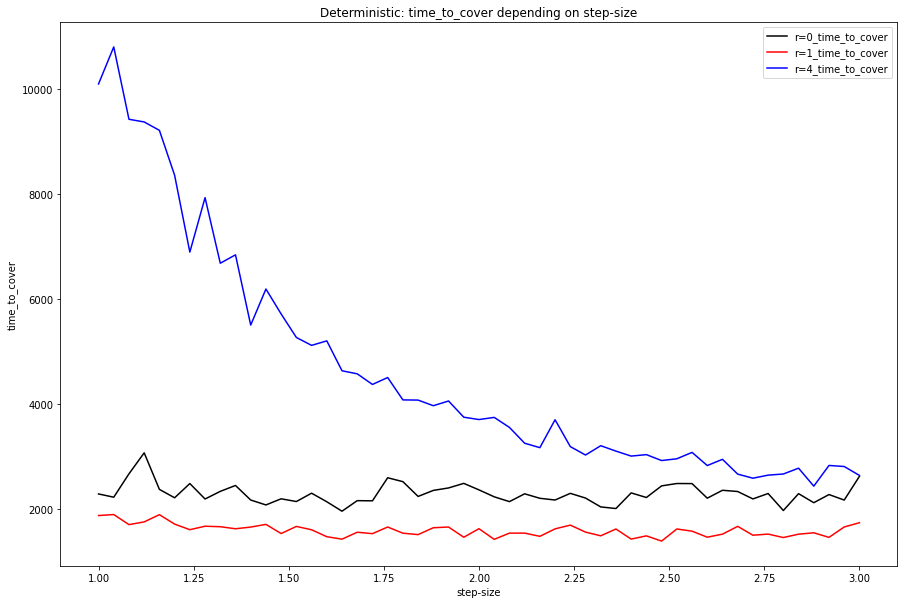

In [19]:
plt.rcParams['figure.figsize'] = [15, 10]

make_plot(dist="Discrete directions continious step", rw=first_rw_step, paramx="step-size", paramy="time_to_cover", colors=colors_for_first)
make_plot(dist="Levy", rw=levy_rw_step, paramx="step-size", paramy="time_to_cover", colors=colors_for_levy)
make_plot(dist="Deterministic", rw=deterministic_rw_step, paramx="step-size", paramy="time_to_cover", colors=colors_for_deterministic)

As expected, the bigger step size - the less it takes to cover all world.  
1) Let's take a look at the first plot (continuous step, discrete directions). Uniform distribution takes the most time to cover, because with the mean=step-size varriance is small compared to other distributions. The poisson and gamma distributions are next, because they also have smaller varriance (equal to mean in our case) than normal and exponential, and have almost no difference. Almost the fastest one is exponential with varriance = mean^2. And the fastest one is normal, which in our case also has varriance = mean ^ 2.  
2) Let's take a look at the second plot (levy distribution). Pareto distribution is a little bit faster than lognormal. But what catches the eye - is how fast cauchy is. I think it's because of the great range of values it produces, so step-size was very different each generation.  
3) Let's take a look at the third plot (deterministic distribution). Parameter r=1 is faster than r=0, probably because when r=0 turtles don't change direction; And the parameter r=4 is really slow because turtles move in shapes which are expanding really slow.  
So, as we can see levy and deterministic distributions can be really fast, but deterministic can also be really slow. And first distribution is medium compared to other two. 


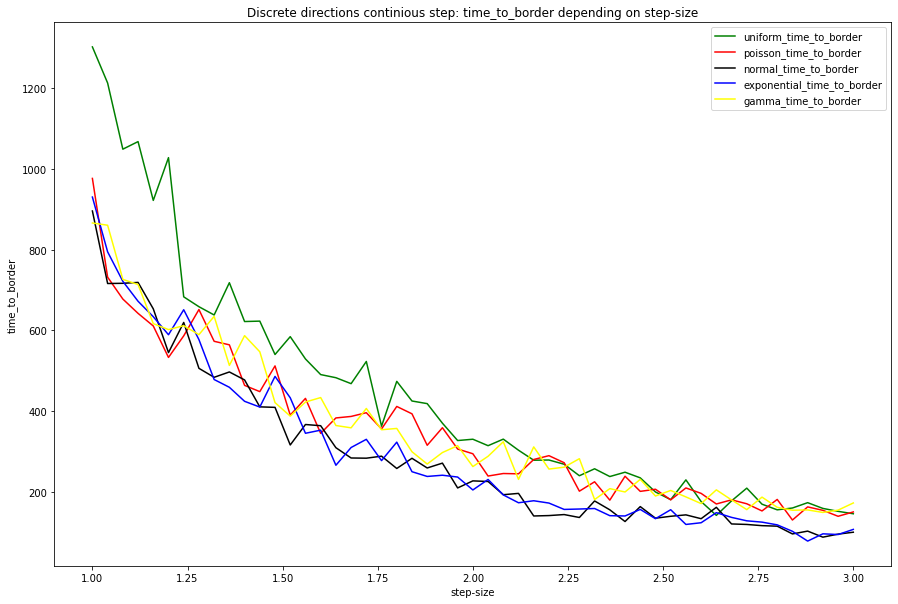

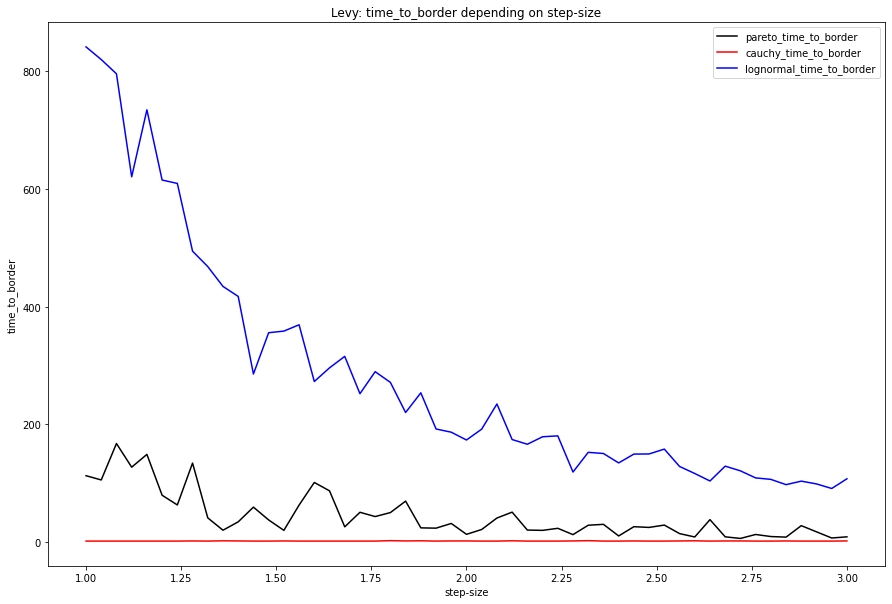

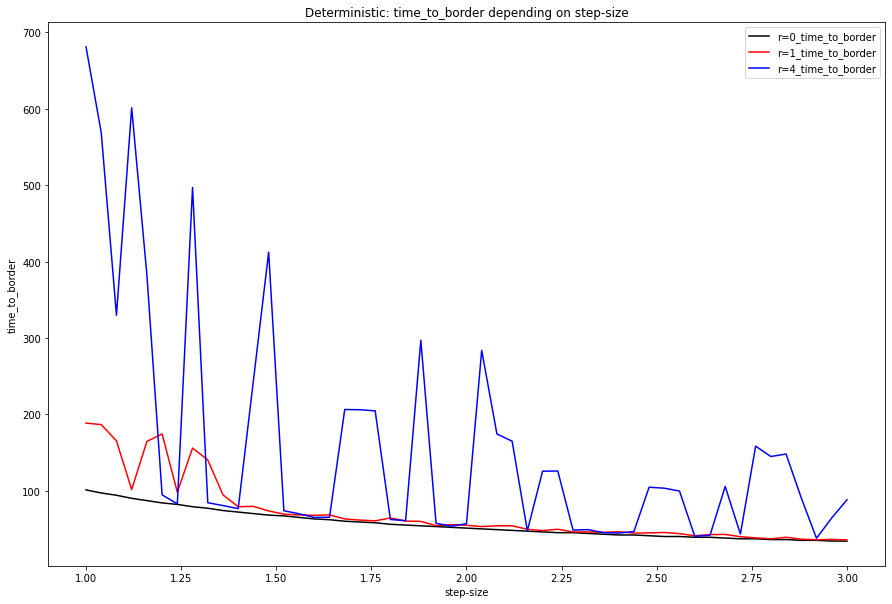

In [20]:
plt.rcParams['figure.figsize'] = [15, 10]

make_plot(dist="Discrete directions continious step", rw=first_rw_step, paramx="step-size", paramy="time_to_border", colors=colors_for_first)
make_plot(dist="Levy", rw=levy_rw_step, paramx="step-size", paramy="time_to_border", colors=colors_for_levy)
make_plot(dist="Deterministic", rw=deterministic_rw_step, paramx="step-size", paramy="time_to_border", colors=colors_for_deterministic)

As expected, the bigger step size - the less it takes to reach the border.  
1) Let's take a look at the first plot (continuous step, discrete directions). The results are the same as in time_to_cover plot and the reason for this is also the same.  
2) Let's take a look at the second plot (levy distribution). Order of distributions remains the same and the reasoning for this is the same as in time_to_cover plot. Also, we see, that for cauchy time to border is equal to 1 for almost every step size. It`s because its values varry so strong that sometimes I was getting step-size = 300 from this distribution. So it takes only 1 step to reach the border of world of the size 201 x 201.  
3) Let's take a look at the third plot (deterministic distribution). All three parameters here are pretty fast. But obviously r=0 is the fastest, because it just goes straight to the border; r=1 also goes to the border, but not with a straight line - it goes with curved line.  
So, as we see from here - levy is the champion if your mission is to get to the border.

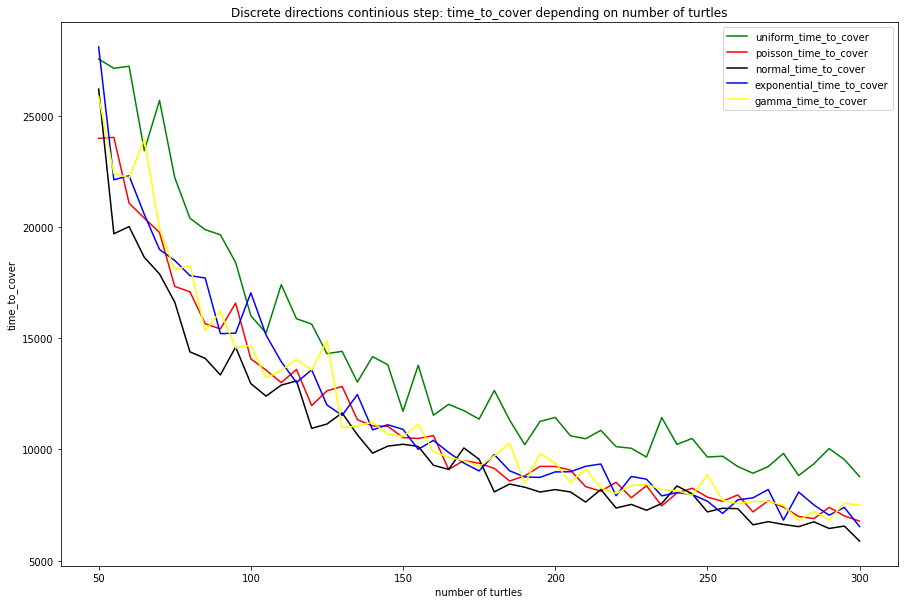

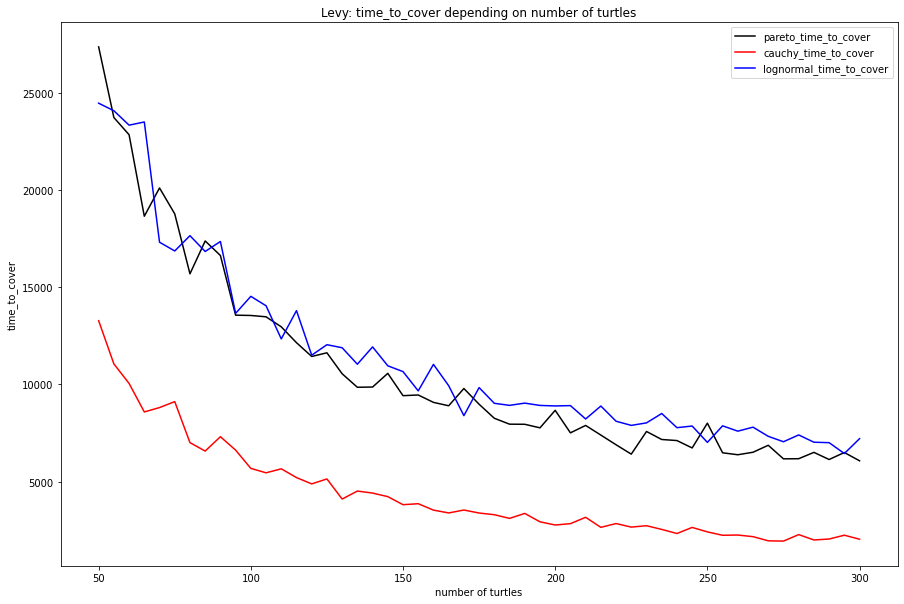

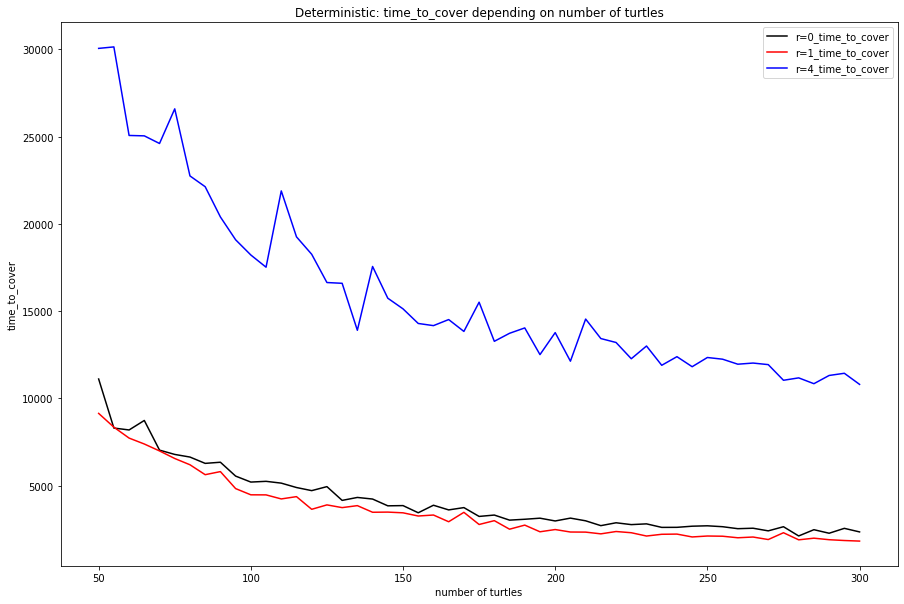

In [28]:
plt.rcParams['figure.figsize'] = [15, 10]

make_plot(dist="Discrete directions continious step", rw=first_rw_num, paramx="number of turtles", paramy="time_to_cover", colors=colors_for_first)
make_plot(dist="Levy", rw=levy_rw_num, paramx="number of turtles", paramy="time_to_cover", colors=colors_for_levy)
make_plot(dist="Deterministic", rw=deterministic_rw_num, paramx="number of turtles", paramy="time_to_cover", colors=colors_for_deterministic)

As expected, the bigger num of agents - the less it takes to cover the world.  
1) Let's take a look at the first plot (continuous step, discrete directions). As we can see from the plot - uniform is again the slowest, and normal - the fastest. Between other three there is almost no difference.  
2) Let's take a look at the second plot (levy distribution). Cauchy is again the fastest and almost no difference between lognormal and pareto.  
3) Let's take a look at the third plot (deterministic distribution).The results look very similar to results in "time to cover depending on step size" plot. And it is pretty much obvious.

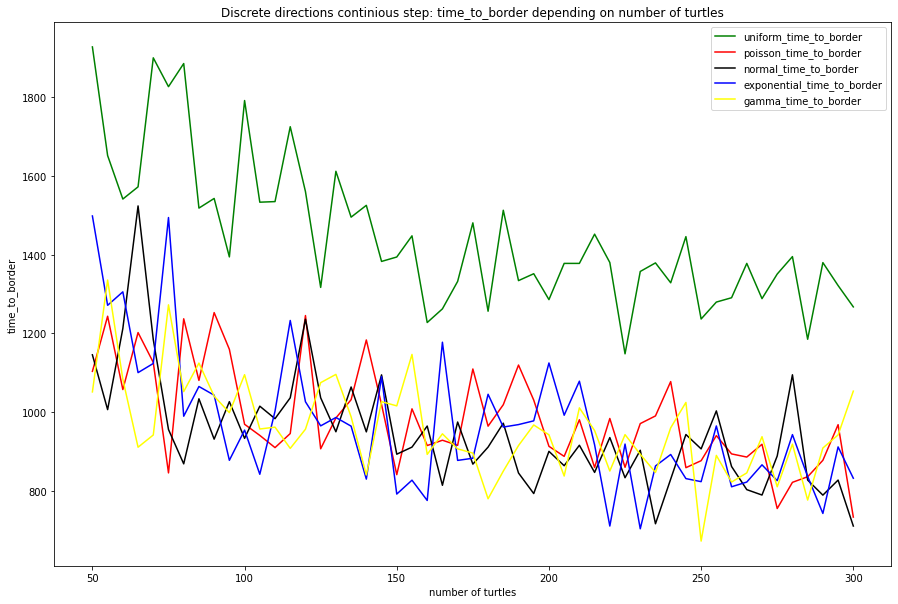

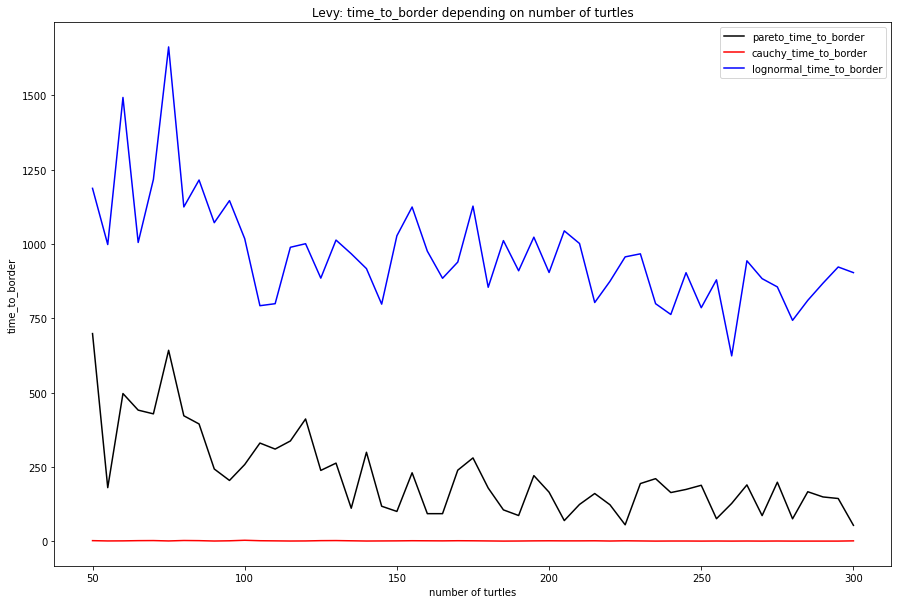

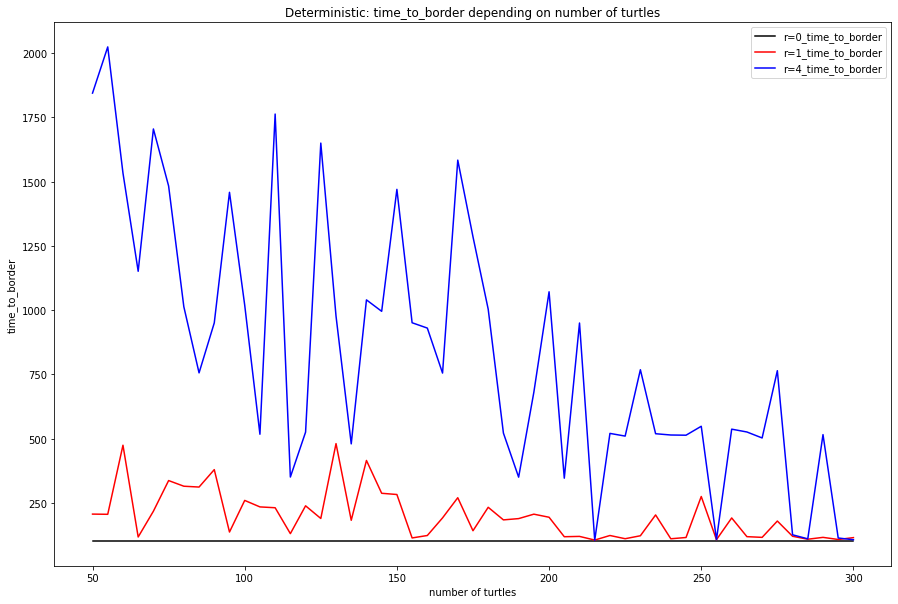

In [29]:
plt.rcParams['figure.figsize'] = [15, 10]

make_plot(dist="Discrete directions continious step", rw=first_rw_num, paramx="number of turtles", paramy="time_to_border", colors=colors_for_first)
make_plot(dist="Levy", rw=levy_rw_num, paramx="number of turtles", paramy="time_to_border", colors=colors_for_levy)
make_plot(dist="Deterministic", rw=deterministic_rw_num, paramx="number of turtles", paramy="time_to_border", colors=colors_for_deterministic)

As expected, number of agents don't make significant change in time to reach border.  
1) Let's take a look at the first plot (continuous step, discrete directions). Uniform is the slowest and other distributions have pretty much the same time. As already mentioned, time to border doesn't really change much from num of agents.
2) Let's take a look at the second plot (levy distribution). Nothing unusual here. We can see that cauchy has a little bigger time values for small num of agents (it takes 2 or 3 steps instead of one, because small amount of turtles has less probability to receive very big step-size).  
3) Let's take a look at the third plot (deterministic distribution). We can see, that for r=0 time ro reach border don't change with number of agents, because all turtles just go straight to the border.
So the main conclusion from these three plots is that num of agents don't really affect time to reach border. 

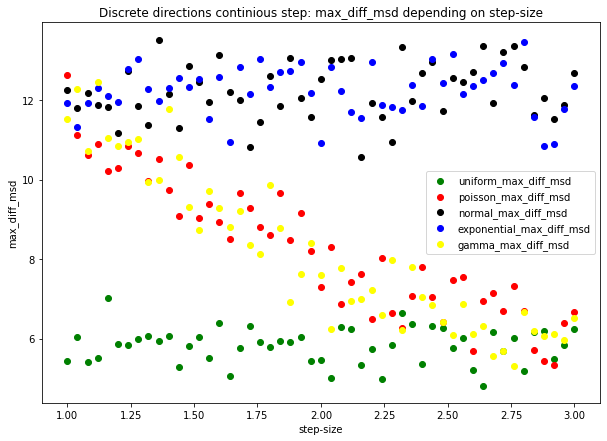

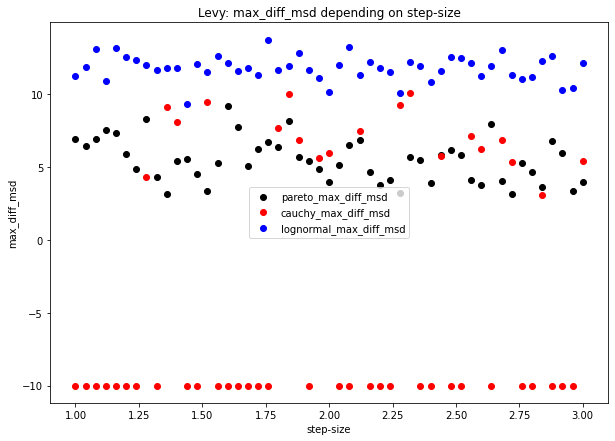

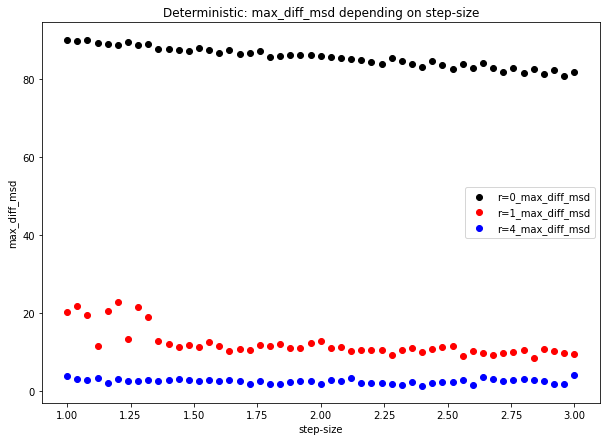

In [24]:
plt.rcParams['figure.figsize'] = [10, 7]

make_plot(dist="Discrete directions continious step", rw=first_rw_step, paramx="step-size", paramy="max_diff_msd", colors=colors_for_first, scatter=True)
make_plot(dist="Levy", rw=levy_rw_step, paramx="step-size", paramy="max_diff_msd", colors=colors_for_levy, scatter=True)
make_plot(dist="Deterministic", rw=deterministic_rw_step, paramx="step-size", paramy="max_diff_msd", colors=colors_for_deterministic, scatter=True)

Here max-diff-msd is the maximum difference between reasl MSD and theoretical one (before turtles reached border). We can see that it doesn't change much with step-size. The interesting thing here is that the results depending on distributions are opposite to previous plots. Because the bigger varrience - the more step-sizes of different turtles varries, and the more MSD differs from theoretical. So we can see that now uniform distribution has the least max-diff-msd and so on.  
The values -10 on second plot mean that turtles reached the border on first step, so we can't get max-diff-msd here.  
For deterministic rw we see, that r=4 has the best result. I think it's because of it slow and cycled expansion.

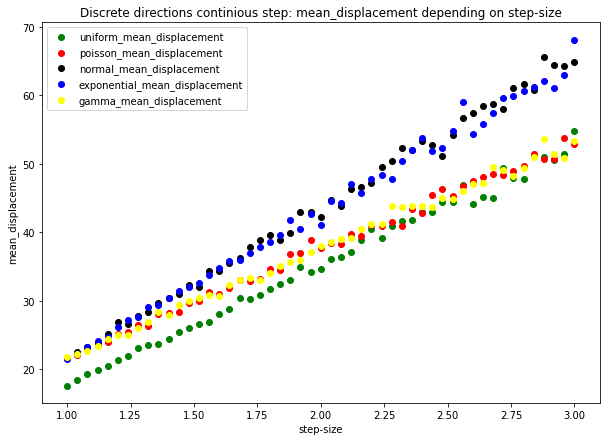

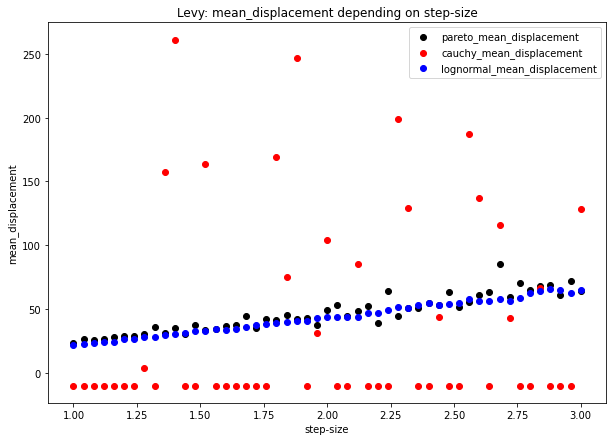

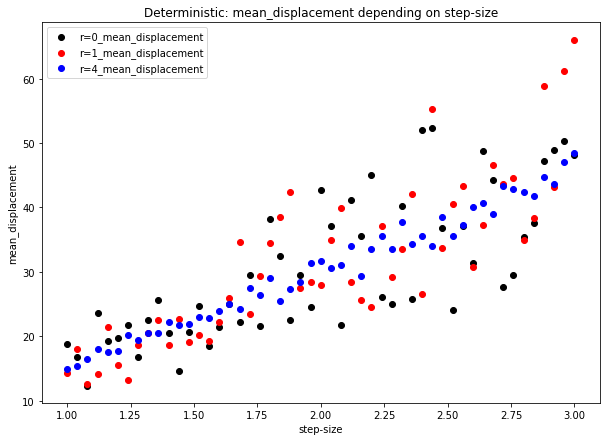

In [25]:
plt.rcParams['figure.figsize'] = [10, 7]

make_plot(dist="Discrete directions continious step", rw=first_rw_step, paramx="step-size", paramy="mean_displacement", colors=colors_for_first, scatter=True)
make_plot(dist="Levy", rw=levy_rw_step, paramx="step-size", paramy="mean_displacement", colors=colors_for_levy, scatter=True)
make_plot(dist="Deterministic", rw=deterministic_rw_step, paramx="step-size", paramy="mean_displacement", colors=colors_for_deterministic, scatter=True)

Mean displacement is measured before turtles reach the border.  
So, as wee see, mean displacement is proportional to step-size, which is logical.And again we see that the results depending on distributions are opposite to first plots. Because the bigger varrience - the more step-sizes of different turtles varries, and the bigger is displacement. So, we can see that uniform distribution has the least mean displacement and so on.  
-10 on cauchy distribution means that turtles reached the border on the first step, so we can't calculate mean displacement. Also, we can notice that results for deterministic coefficients are pretty same. Also, we see that everywhere mean_displacement is pretty small, except some cauchy cases.

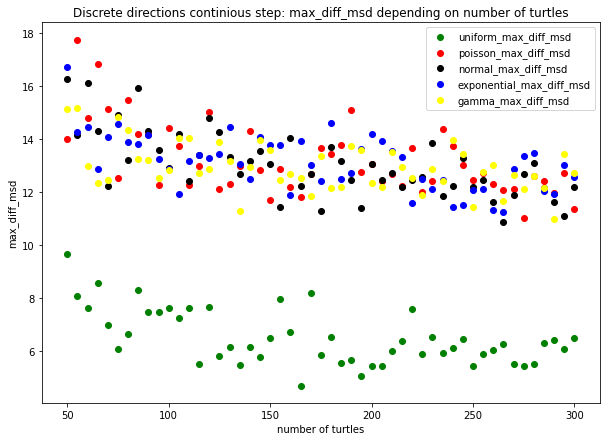

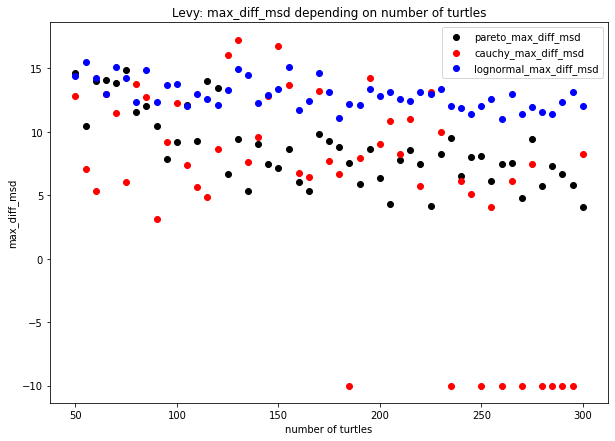

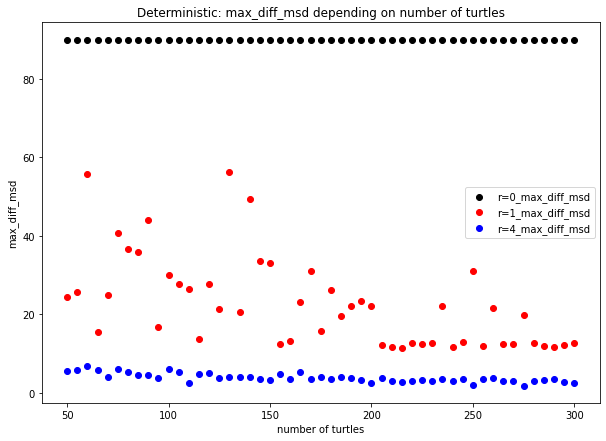

In [30]:
plt.rcParams['figure.figsize'] = [10, 7]

make_plot(dist="Discrete directions continious step", rw=first_rw_num, paramx="number of turtles", paramy="max_diff_msd", colors=colors_for_first, scatter=True)
make_plot(dist="Levy", rw=levy_rw_num, paramx="number of turtles", paramy="max_diff_msd", colors=colors_for_levy, scatter=True)
make_plot(dist="Deterministic", rw=deterministic_rw_num, paramx="number of turtles", paramy="max_diff_msd", colors=colors_for_deterministic, scatter=True)

We see that all three plots looks like plots max-diff-msd depending on step-size and it's quite logical.

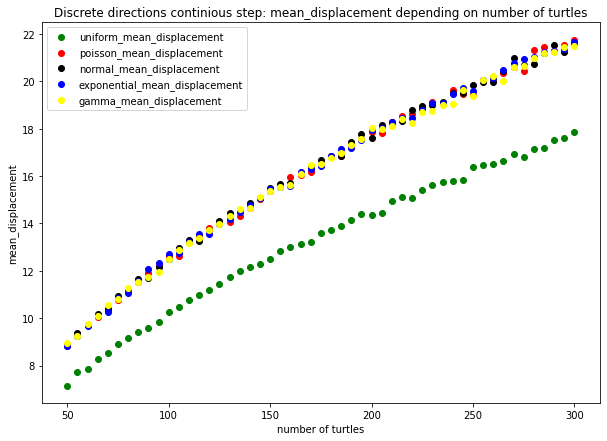

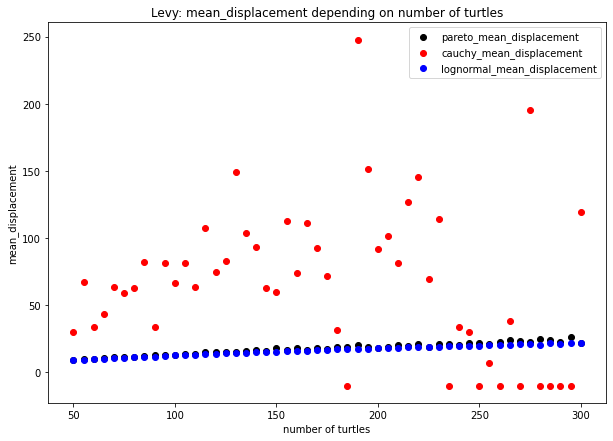

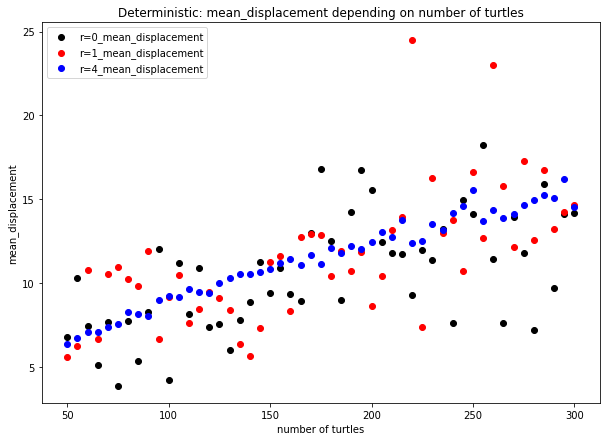

In [31]:
plt.rcParams['figure.figsize'] = [10, 7]

make_plot(dist="Discrete directions continious step", rw=first_rw_num, paramx="number of turtles", paramy="mean_displacement", colors=colors_for_first, scatter=True)
make_plot(dist="Levy", rw=levy_rw_num, paramx="number of turtles", paramy="mean_displacement", colors=colors_for_levy, scatter=True)
make_plot(dist="Deterministic", rw=deterministic_rw_num, paramx="number of turtles", paramy="mean_displacement", colors=colors_for_deterministic, scatter=True)

We see that all three plots looks like plots max-diff-msd depending on step-size and it's quite logical.

In [32]:
def build_angle_previous_angle_plot(dist: str, name: str):
    with open(name, mode="r") as file_plot:
        file_plot.readline()
        x_list = []
        y_list = []
        for line in file_plot:
            line = line.strip()
            splitted_line = line.split(',"')
            splitted_line = splitted_line[:2]
            length = 2
            for ind in range(length):
                splitted_line[ind] = float(splitted_line[ind].strip('"'))
            x_list.append(splitted_line[0])
            y_list.append(splitted_line[1])

        plt.xlabel("Previous angle")
        plt.ylabel("Angle")
        plt.title(f"{dist}: angle depending on previous angle")
        plt.scatter(x_list, y_list, color="black")
        plt.show()

Now let's analyse the angle depending on previous angle plots:

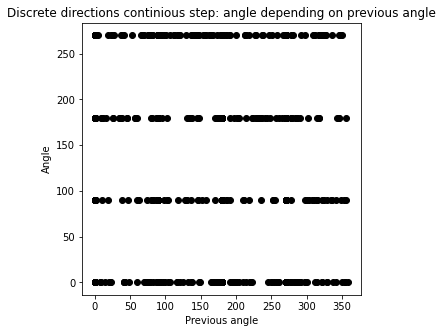

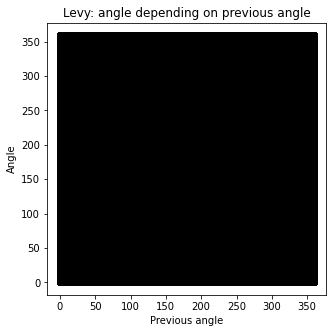

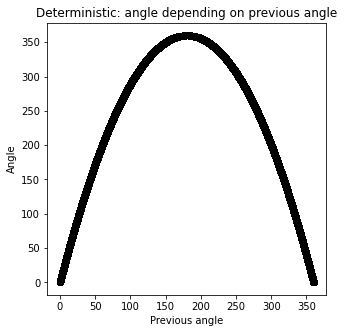

In [34]:
plt.rcParams['figure.figsize'] = [5, 5]
build_angle_previous_angle_plot(dist="Discrete directions continious step", name="angle_previous_angle_discrete_directions_continuous_step.csv")
build_angle_previous_angle_plot(dist="Levy", name="angle_previous_angle_levy.csv")
build_angle_previous_angle_plot(dist="Deterministic", name="angle_previous_angle_deterministic.csv")

1) Let's take a look at the first plot (continuous step, discrete directions). As we generated turtles with random heading at the beginning - we have different previous angles on x-axis. And because our rw has discrete directions, on y-axis we only have angles [0, 90, 180, 270].  
2) Let's take a look at the second plot (levy distribution). As we take random angles - we get black square (huge amount of different combinations of angle depending on previous angle).  
3) Let's take a look at the second plot (deterministic). As we have equation "x_(n+1) = r * x_n(1-x_n)", we get a plot of parabola.


Let`s now investigate for which coefficients r of deterministic equation we get cycled turtles (num=300, step-size=1):

In [35]:
def build_plot_r(name: str):
    with open(name, mode="r") as file_plot:
        file_plot.readline()
        x_list = []
        y_list = []
        tmp_dict = {}
        for line in file_plot:
            line = line.strip()
            splitted_line = line.split(',"')
            r = float(splitted_line[2].strip('"'))
            covered = splitted_line[6].strip('"')
            if covered == "true":
                tmp_dict[r] = 1
            else:
                tmp_dict[r] = 0
            x_list.append(r)

        x_list.sort()
        for el in x_list:
            y_list.append(tmp_dict[el])

        plt.xlabel("r")
        plt.ylabel("Covers all world?")
        plt.title("Deterministic rw: Plot that shows if rw isn`t stuck in cycle (0 - cycled; 1 - not cycled)")
        plt.plot(x_list, y_list, color="black")
        plt.show()

        going_count = 0
        output = ""
        for ind in range(0, len(x_list)):
          el = x_list[ind]
          if tmp_dict[el] == 1:
              if going_count == 1:
                  output = output[:-3] + "; "
              elif going_count > 1:
                  output += f"{x_list[ind - 1]}; "
              else:
                  pass
              going_count = 0
          else:
              if going_count == 0:
                  if (ind < len(x_list) - 1) and (x_list[ind + 1] != True):
                      output += f"{el} - "
                  elif ind == len(x_list) - 1:
                      ouput += f"{el}"
                  else:
                      ouput += f"{el}; "
              else:
                  if (ind < len(x_list) - 1) and (x_list[ind + 1] != True):
                      pass
                  elif ind == len(x_list) - 1:
                      ouput += f"{el}"
                  else:
                      pass
              going_count += 1

        if (output != "") and (output[-1] == ' '):
            return "These r lead to cycle: " + output[:-2]
        return "These r lead to cycle: " + output     


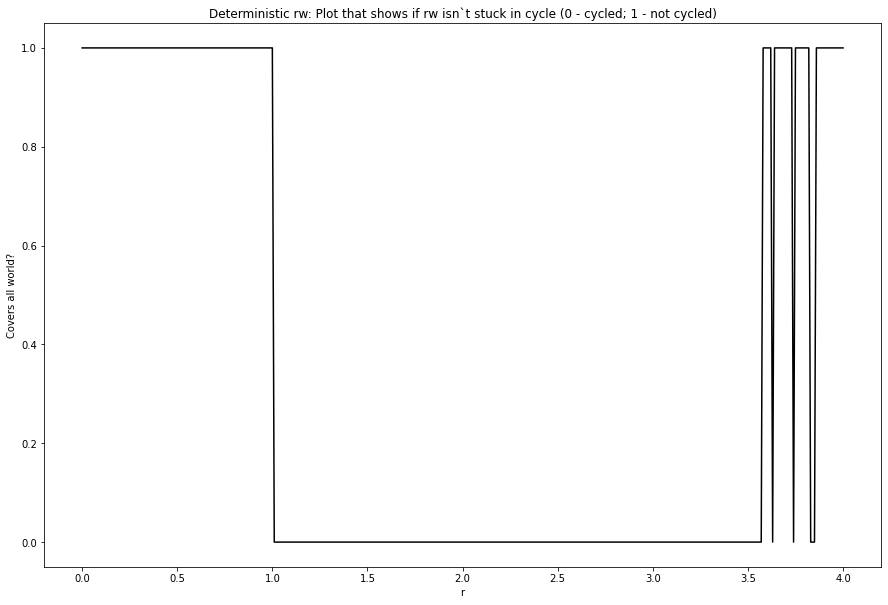

These r lead to cycle: 1.01 - 3.57; 3.63; 3.74; 3.83 - 3.85


In [36]:
plt.rcParams['figure.figsize'] = [15, 10]
print(build_plot_r("experiment_r-table.csv"))